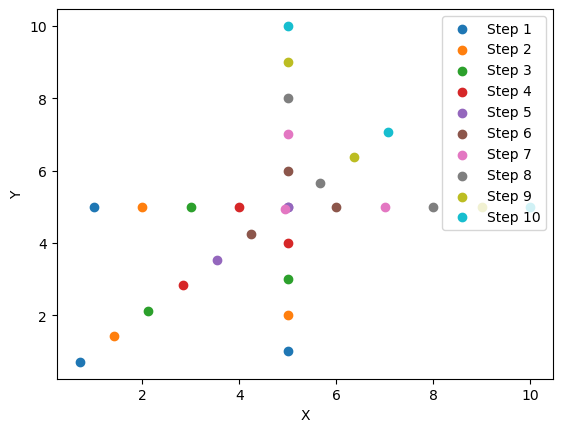

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Pedestrian:
    def __init__(self, position, goal, speed=1.0):
        self.position = np.array(position, dtype=np.float64)
        self.goal = np.array(goal, dtype=np.float64)
        self.speed = speed

    def update_position(self):
        direction = self.goal - self.position
        direction_norm = np.linalg.norm(direction)
        if direction_norm > 0:
            direction_unit = direction / direction_norm
            self.position += self.speed * direction_unit

def simulate_pedestrians(pedestrians, steps, dt=1.0):
    positions = []
    for _ in range(steps):
        step_positions = []
        for pedestrian in pedestrians:
            pedestrian.update_position()
            step_positions.append(pedestrian.position.copy())
        positions.append(step_positions)
    return np.array(positions)

def plot_pedestrians(positions):
    for i, pos in enumerate(positions):
        pos = np.array(pos)
        plt.scatter(pos[:, 0], pos[:, 1], label=f'Step {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Initialize pedestrians
    p1 = Pedestrian([0, 0], [10, 10])
    p2 = Pedestrian([0, 5], [10, 5])
    p3 = Pedestrian([5, 0], [5, 10])

    pedestrians = [p1, p2, p3]

    # Simulate and plot
    positions = simulate_pedestrians(pedestrians, steps=10)
    plot_pedestrians(positions)


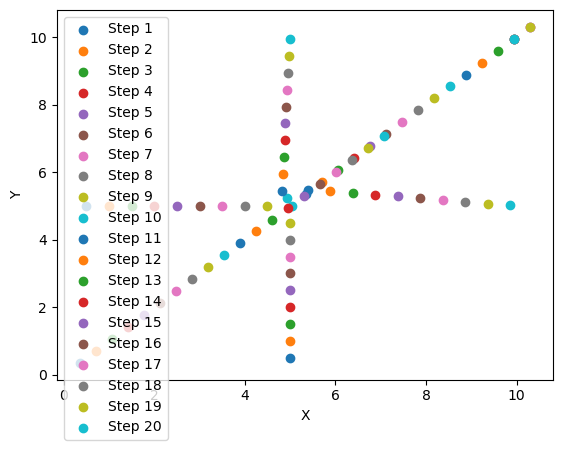

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Pedestrian:
    def __init__(self, position, goal, speed=0.5):
        self.position = np.array(position, dtype=np.float64)
        self.goal = np.array(goal, dtype=np.float64)
        self.speed = speed

    def update_position(self, others):
        direction_to_goal = self.goal - self.position
        norm_to_goal = np.linalg.norm(direction_to_goal)
        
        if norm_to_goal > 0:
            unit_direction_to_goal = direction_to_goal / norm_to_goal
        else:
            unit_direction_to_goal = np.zeros_like(direction_to_goal)
        
        repulsion_force = np.zeros(2)
        for other in others:
            if other == self:
                continue
            diff = self.position - other.position
            distance = np.linalg.norm(diff)
            if distance < 1.0:
                repulsion_force += diff / (distance + 1e-9)
        
        net_force = unit_direction_to_goal + 0.5 * repulsion_force
        net_force_norm = np.linalg.norm(net_force)
        
        if net_force_norm > 0:
            self.position += self.speed * (net_force / net_force_norm)

class Simulation:
    def __init__(self, pedestrians, steps):
        self.pedestrians = pedestrians
        self.steps = steps
        self.positions = []

    def run(self):
        for _ in range(self.steps):
            step_positions = []
            for pedestrian in self.pedestrians:
                pedestrian.update_position(self.pedestrians)
                step_positions.append(pedestrian.position.copy())
            self.positions.append(step_positions)

    def plot(self):
        for i, pos in enumerate(self.positions):
            pos = np.array(pos)
            plt.scatter(pos[:, 0], pos[:, 1], label=f'Step {i+1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    p1 = Pedestrian([0, 0], [10, 10])
    p2 = Pedestrian([0, 5], [10, 5])
    p3 = Pedestrian([5, 0], [5, 10])
    p4 = Pedestrian([5, 5], [10, 10])

    pedestrians = [p1, p2, p3, p4]
    simulation = Simulation(pedestrians, steps=20)

    simulation.run()
    simulation.plot()


In [4]:
class SocialForceModel:
    def __init__(self, mass, initial_position, initial_velocity):
        self.mass = mass
        self.position = initial_position
        self.velocity = initial_velocity

    def calculate_force(self, goal_force, repulsion_force, attraction_force):
        return goal_force + repulsion_force + attraction_force

    def update_position(self, total_force, time_step):
        acceleration = total_force / self.mass
        self.position += self.velocity * time_step + 0.5 * acceleration * (time_step ** 2)
        self.velocity += acceleration * time_step

# Test case
sfm = SocialForceModel(70, 0, 0)
total_force = sfm.calculate_force(10, -5, 2)
sfm.update_position(total_force, 0.1)
print(f"New position: {sfm.position}, New velocity: {sfm.velocity}")


New position: 0.0005000000000000001, New velocity: 0.010000000000000002


This class includes methods to calculate the total force acting on an individual and update their position accordingly. The test case demonstrates how to use the class to calculate a new position and velocity based on given forces.

The Social Force Model is not just an academic exercise; it has real-world applications. Urban planners, for example, can use it to design more efficient and safer public spaces. Event organizers can employ it to manage large crowds and improve safety measures. It's a tool that invites us to delve deeper into the complexities of human behavior, offering both clarity and nuance in equal measure.